In [654]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Importing libraries for KMeans Clustering
from sklearn.cluster import KMeans

#Importing Libraries for Hierarchical Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [655]:
#Loading Country Dataset using PANDAS
df=pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [656]:
#To check Size of Data set in terms of rows and columns
df.shape

(167, 10)

In [657]:
#To check the Data type of each Column present in Country data set
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [658]:
# To check if there are any missing/null values present in Country Data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [659]:
#To check  the count of Null Values, if att all present in any column
df.isnull().sum()
#Observation: Country data set does not contain Null values present in any column

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [660]:
# To get the pre-define statistical values for all Numerical columns
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [661]:
# To check number of distinct countries present in data set
df.country.value_counts()
#Observation: 167 Distinct Countries are present in the data set
    

Congo, Rep.    1
Greece         1
Russia         1
Bahrain        1
Latvia         1
              ..
Portugal       1
Azerbaijan     1
Malaysia       1
New Zealand    1
Cambodia       1
Name: country, Length: 167, dtype: int64

In [662]:
# To Convert EXPORTS Column from percentage to numerical value upto 2 decimal places
df['exports']=round((df['exports']*df['gdpp'])/100,2)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,6.03,58.9,19100,1.44,76.8,2.13,12200


In [663]:
# To Convert HEALTH Column from percentage to numerical value upto 2 decimal places
df['health']=round((df['health']*df['gdpp'])/100,2)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,58.9,19100,1.44,76.8,2.13,12200


In [664]:
# To Convert IMPORTS Column from percentage to numerical value upto 2 decimal places
df['imports']=round((df['imports']*df['gdpp'])/100,2)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200


In [665]:
# To check the pred-defined statistical function values for Numercial columns in our data set
df.describe()

#Observation: Based on the result, we dont see any distinct outliers,
#However, for outliers we would be using Box Plots later for bettter visulaizaing and outlier identification.


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618862,1056.733174,6588.352096,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885789,1801.408921,14710.810423,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.080000,12.820000,0.650000,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535000,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.890000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Performing EDA

In [666]:
#Univariate Analysis

In [667]:
f=df.columns
list(enumerate(f[1:]))
# We use Enumertare function to add Index number to each of the element
# We Ignore 'COUNTRY' column as its of 'Object' data type

[(0, 'child_mort'),
 (1, 'exports'),
 (2, 'health'),
 (3, 'imports'),
 (4, 'income'),
 (5, 'inflation'),
 (6, 'life_expec'),
 (7, 'total_fer'),
 (8, 'gdpp')]

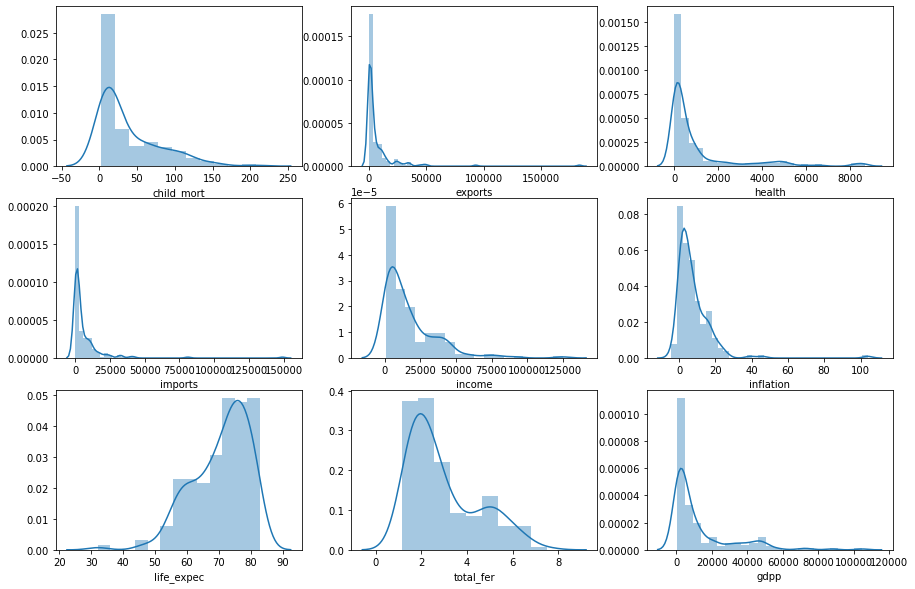

In [668]:
# Plotting the Distribution Plot for Each Numercial column in given Country Data set
plt.figure(figsize=(15,10))
f=df.columns
for i in enumerate(f[1:]):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])

# We have ignored the Country column having Object data type in our data set.

Inference:
1. As per observation , the graphs are not completely Normally distrubuted. In case of child_mort.income and life_expec,total_fer and gdpp we c et multiple spikes.
2. Most of the countries have the Child mortality of less than 50.
3.  Highest Inflation rate of around 10 was recorded for most of teh countries.
4. Large number of countries have life expectancy between age of 50 and 80 years
5. Most of the countries have a total_fer less than 4.
6. Maximu countries have a gdpp less than 20000.


<Figure size 720x720 with 0 Axes>

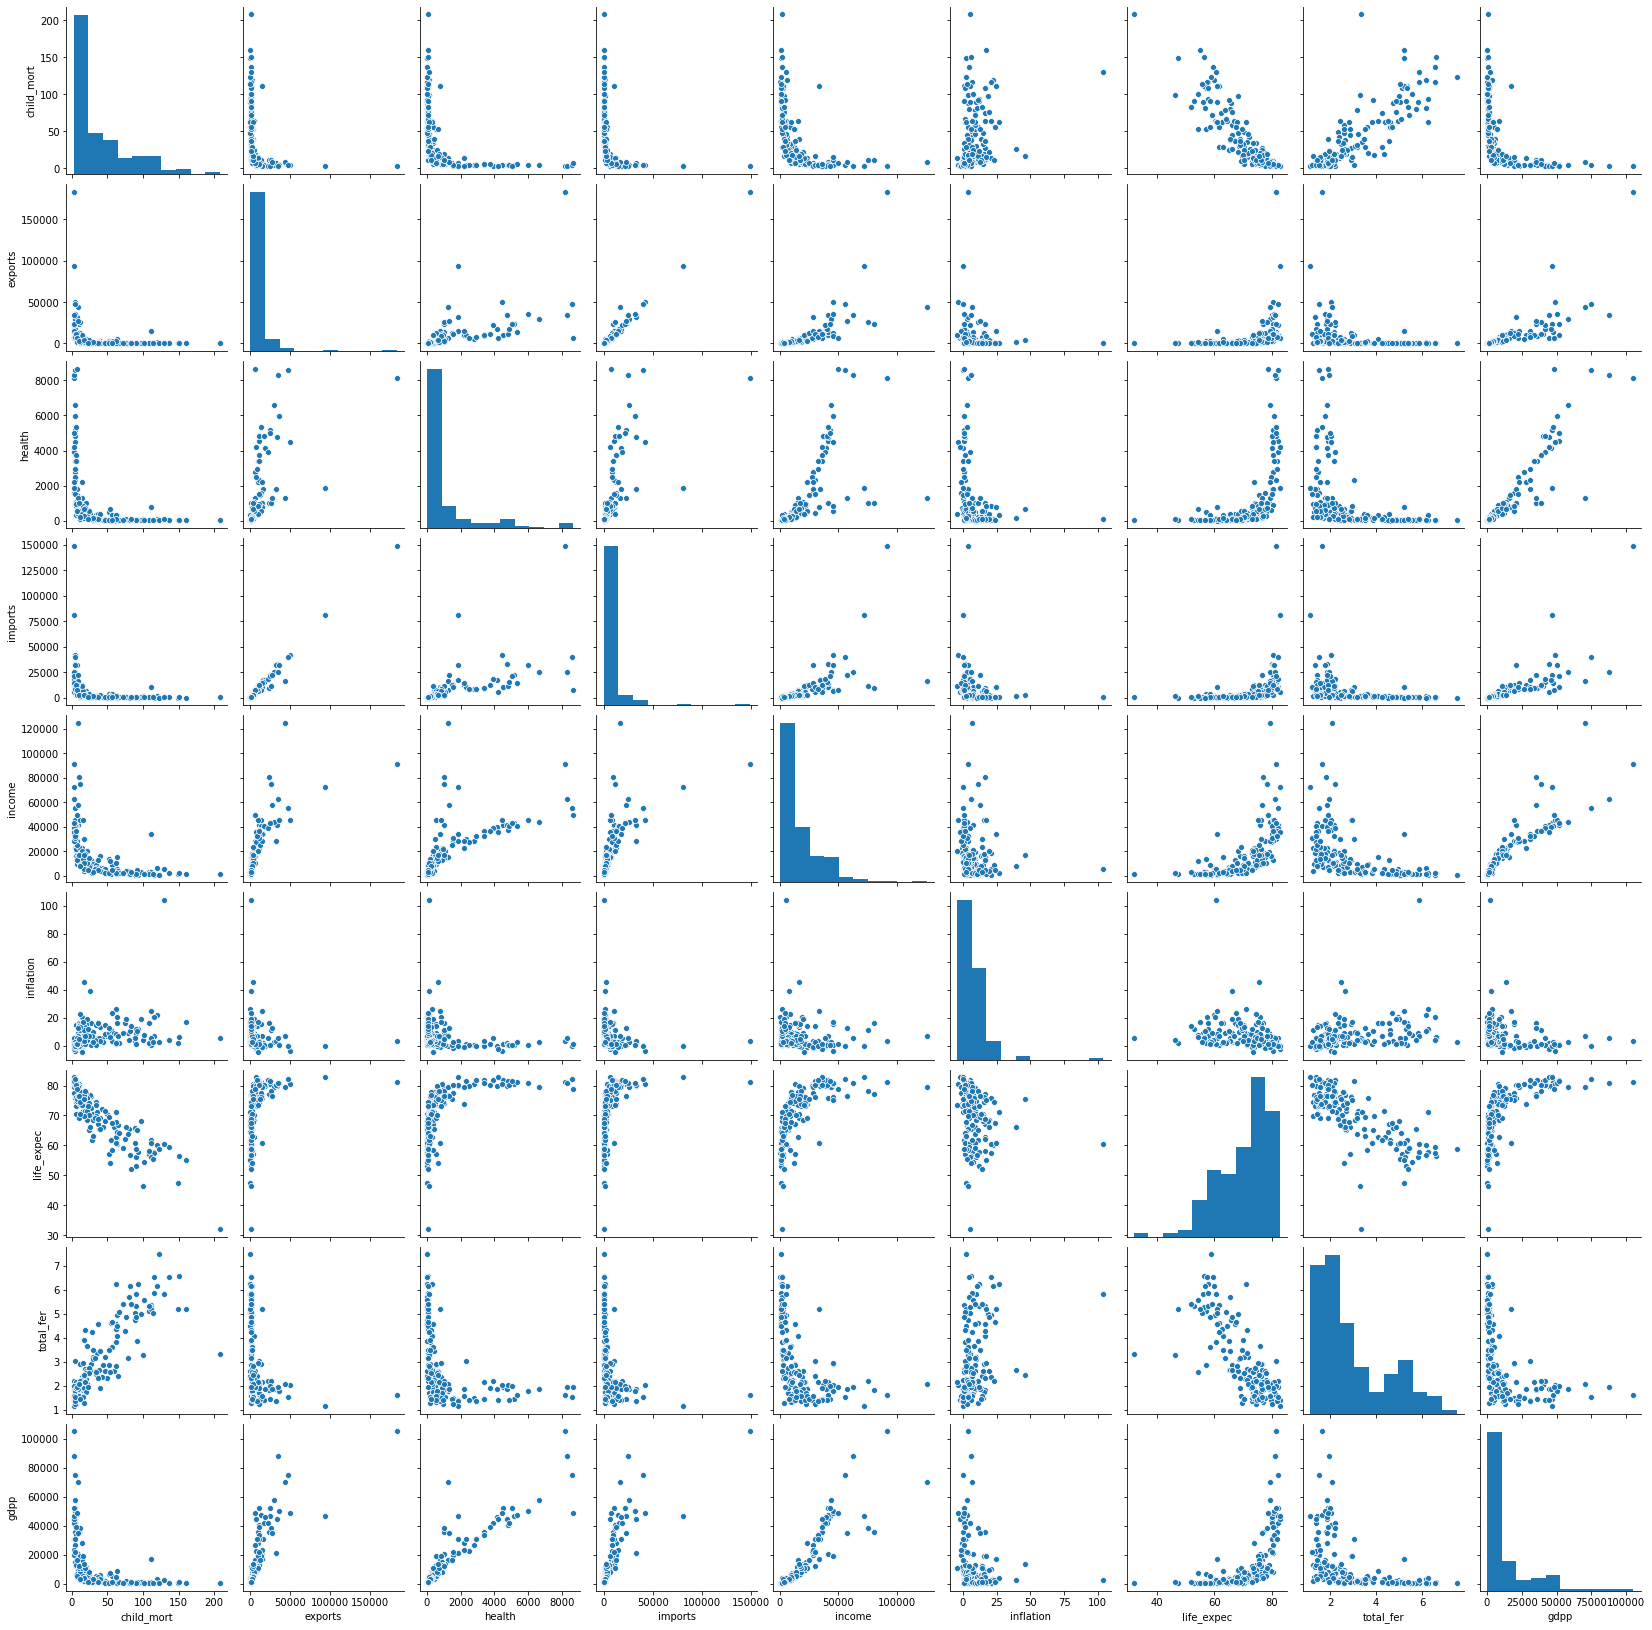

In [669]:
# Bivariate Analysis: Continous vs Continuous variable
plt.figure(figsize=(10,10))
sns.pairplot(data=df,vars=['child_mort', 'exports', 'health', 'imports','income', 'inflation','life_expec','total_fer','gdpp'])
plt.show()

# Inference: 
1.	Exports is increasing in GDPP of a country.
2.	Health expenditure is increasing with increase in GDPP of country
3.	Imports of good and service increases with increase in GDPP
4.	With increasing Income of the employee, the GDPP of the country increases.
5.	With increase in GDPP, the inflation rate does not change much.
6.	With increase in GDPP, Life_expec shows an Increasing trend.
7.	With Increase in GDPP, the tota_fer decreases.

In [670]:
# Bivariate- categorical VS Numercial

In [671]:
Child_Mort_Top10=df.sort_values(by=['child_mort'],ascending=[False]).head(10)

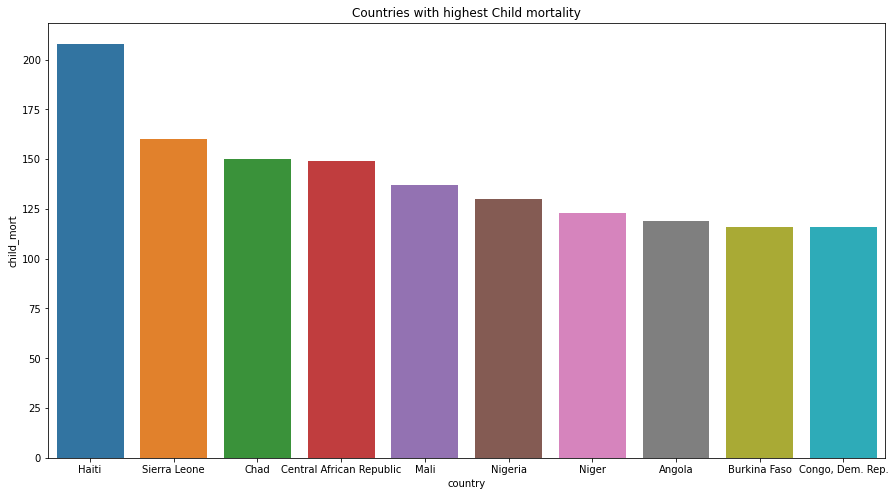

In [672]:
# COUNTRY vs child_mort
plt.figure(figsize=(15,8))
sns.barplot(x = 'country', y ='child_mort', data=Child_Mort_Top10)
plt.title('Countries with highest Child mortality')

plt.show()


Observation:
1. Country : Haiti and Sierra leone have the Highest Child mortality in the data set.
2. Display the list of Top 10 countries with Highest Child mortality.


In [673]:
Export_Low_10=df.sort_values(by=['exports'],ascending=[True]).head(10)
Export_Low_10

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
107,Myanmar,64.4,1.08,19.46,0.65,3720,7.04,66.8,2.41,988
26,Burundi,93.6,20.61,26.80,90.55,764,12.30,57.7,6.26,231
50,Eritrea,55.2,23.09,12.82,112.31,1420,11.60,61.7,4.61,482
31,Central African Republic,149.0,52.63,17.75,118.19,888,2.01,47.5,5.21,446
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553
109,Nepal,47.0,56.71,31.08,215.49,1990,15.10,68.3,2.61,592
88,Liberia,89.3,62.46,38.59,302.80,700,5.47,60.8,5.02,327
132,Sierra Leone,160.0,67.03,52.27,137.66,1220,17.20,55.0,5.20,399
126,Rwanda,63.6,67.56,59.12,168.90,1350,2.61,64.6,4.51,563
112,Niger,123.0,77.26,17.96,170.87,814,2.55,58.8,7.49,348


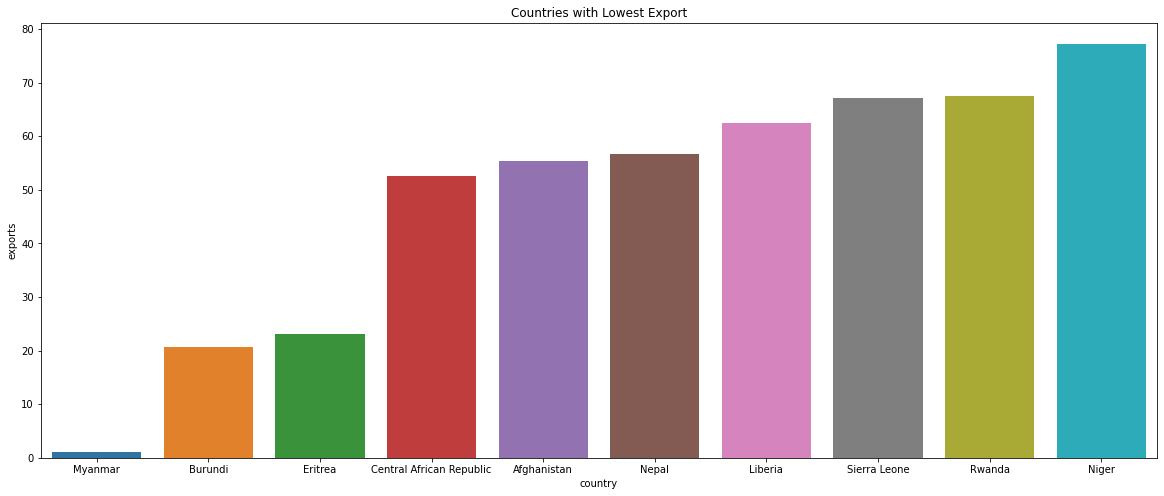

In [674]:
# COUNTRY vs EXPORTs
plt.figure(figsize=(20,8))
sns.barplot(x = 'country', y ='exports', data=Export_Low_10)
plt.title('Countries with Lowest Export')

plt.show()

Observation:
1. Country : Myanmar have the Lowest export  amongst all the countries.
2. Display the list of Top 10 countries with Lowest Export.


In [675]:
Health_Low_10=df.sort_values(by=['health'],ascending=[True]).head(10)
Health_Low_10

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
50,Eritrea,55.2,23.09,12.82,112.31,1420,11.60,61.7,4.61,482
93,Madagascar,62.2,103.25,15.57,177.59,1390,8.79,60.8,4.60,413
31,Central African Republic,149.0,52.63,17.75,118.19,888,2.01,47.5,5.21,446
112,Niger,123.0,77.26,17.96,170.87,814,2.55,58.8,7.49,348
107,Myanmar,64.4,1.08,19.46,0.65,3720,7.04,66.8,2.41,988
106,Mozambique,101.0,131.99,21.83,193.58,918,7.64,54.5,5.56,419
116,Pakistan,92.1,140.40,22.88,201.76,4280,10.90,65.3,3.85,1040
37,"Congo, Dem. Rep.",116.0,137.27,26.42,165.66,609,20.80,57.5,6.54,334
12,Bangladesh,49.4,121.28,26.68,165.24,2440,7.14,70.4,2.33,758
26,Burundi,93.6,20.61,26.80,90.55,764,12.30,57.7,6.26,231


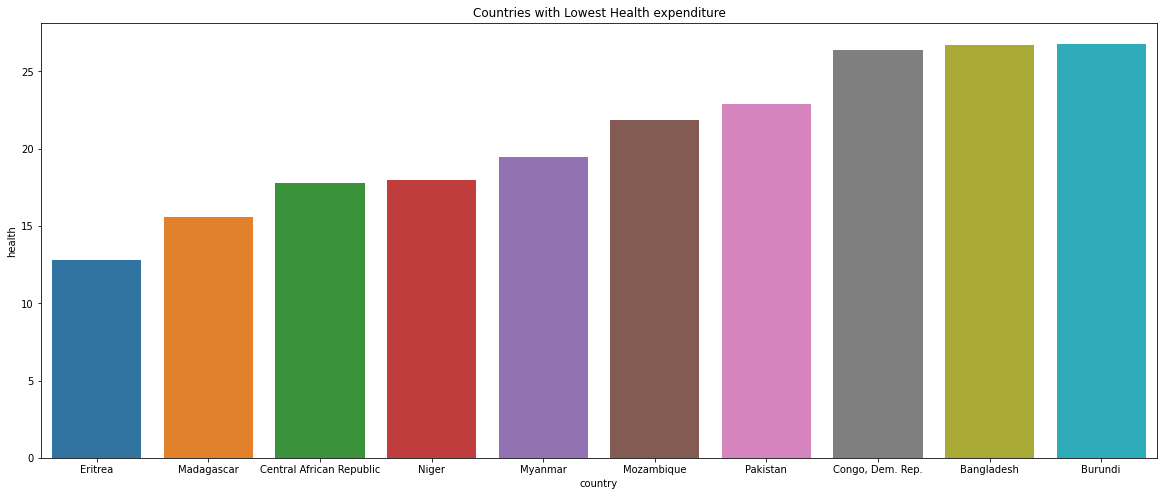

In [676]:
# COUNTRY vs EXPORTs
plt.figure(figsize=(20,8))
sns.barplot(x = 'country', y ='health', data=Health_Low_10)
plt.title('Countries with Lowest Health expenditure')

plt.show()

Observation:
1. Country : Entrea and Madagaskar have the Lowest health expediture amongst all the countries.
2. Display the list of Top 10 countries with Lowest Health expenditure.



In [677]:
Import_Low_10=df.sort_values(by=['imports'],ascending=[True]).head(10)
Import_Low_10

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
107,Myanmar,64.4,1.08,19.46,0.65,3720,7.04,66.8,2.41,988
26,Burundi,93.6,20.61,26.80,90.55,764,12.30,57.7,6.26,231
50,Eritrea,55.2,23.09,12.82,112.31,1420,11.60,61.7,4.61,482
31,Central African Republic,149.0,52.63,17.75,118.19,888,2.01,47.5,5.21,446
132,Sierra Leone,160.0,67.03,52.27,137.66,1220,17.20,55.0,5.20,399
94,Malawi,90.5,104.65,30.25,160.19,1030,12.10,53.1,5.31,459
12,Bangladesh,49.4,121.28,26.68,165.24,2440,7.14,70.4,2.33,758
37,"Congo, Dem. Rep.",116.0,137.27,26.42,165.66,609,20.80,57.5,6.54,334
126,Rwanda,63.6,67.56,59.12,168.90,1350,2.61,64.6,4.51,563
155,Uganda,81.0,101.74,53.61,170.17,1540,10.60,56.8,6.15,595


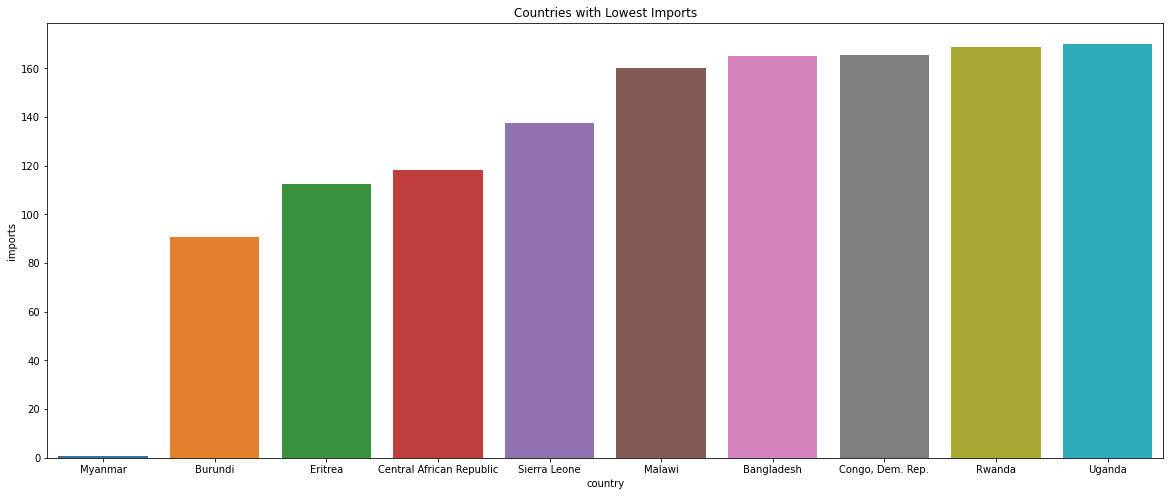

In [678]:
# COUNTRY vs IMPORTs
plt.figure(figsize=(20,8))
sns.barplot(x = 'country', y ='imports', data=Import_Low_10)
plt.title('Countries with Lowest Imports')

plt.show()

Observation:
1. Country : Myanmar have the Lowest Import amongst all the countries.
2. Display the list of Top 10 countries with Lowest Import.



In [679]:
Income_Low_10=df.sort_values(by=['income'],ascending=[True]).head(10)
Income_Low_10

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
37,"Congo, Dem. Rep.",116.0,137.27,26.42,165.66,609,20.80,57.5,6.54,334
88,Liberia,89.3,62.46,38.59,302.80,700,5.47,60.8,5.02,327
26,Burundi,93.6,20.61,26.80,90.55,764,12.30,57.7,6.26,231
112,Niger,123.0,77.26,17.96,170.87,814,2.55,58.8,7.49,348
31,Central African Republic,149.0,52.63,17.75,118.19,888,2.01,47.5,5.21,446
106,Mozambique,101.0,131.99,21.83,193.58,918,7.64,54.5,5.56,419
94,Malawi,90.5,104.65,30.25,160.19,1030,12.10,53.1,5.31,459
63,Guinea,109.0,196.34,31.95,279.94,1190,16.10,58.0,5.34,648
150,Togo,90.3,196.18,37.33,279.62,1210,1.18,58.7,4.87,488
132,Sierra Leone,160.0,67.03,52.27,137.66,1220,17.20,55.0,5.20,399


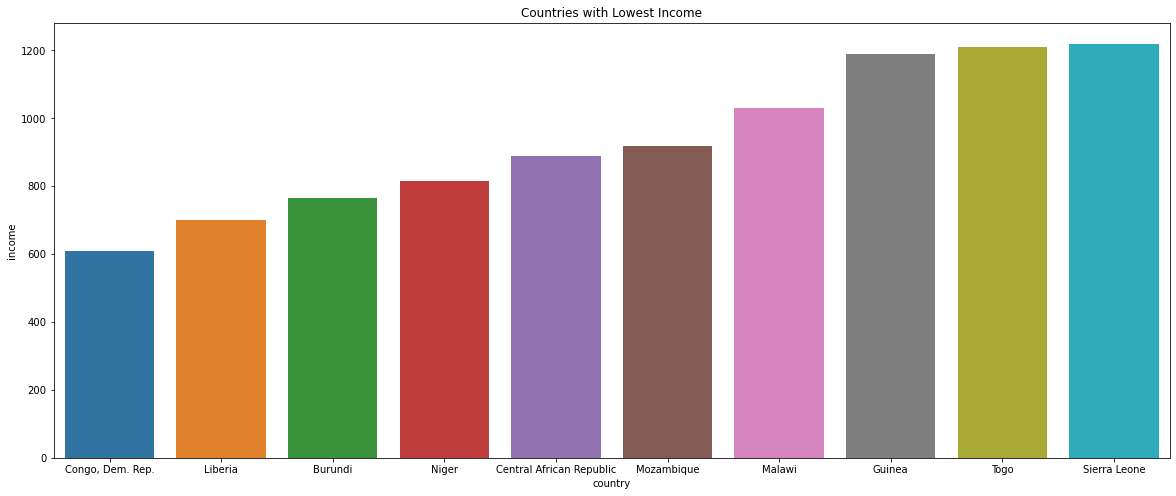

In [680]:
# COUNTRY vs INCOME
plt.figure(figsize=(20,8))
sns.barplot(x = 'country', y ='income', data=Income_Low_10)
plt.title('Countries with Lowest Income')

plt.show()

Observation:
1. Country : Congo.Dem.Rep have the Lowest Income amongst all the countries.
2. Display the list of Top 10 countries with Lowest Income.



In [681]:
Inflation_Top_10=df.sort_values(by=['inflation'],ascending=[False]).head(10)
Inflation_Top_10

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
113,Nigeria,130.0,589.49,118.13,405.42,5150,104.0,60.5,5.84,2330
163,Venezuela,17.1,3847.50,662.85,2376.00,16500,45.9,75.4,2.47,13500
103,Mongolia,26.1,1237.55,144.16,1502.55,7710,39.2,66.2,2.64,2650
149,Timor-Leste,62.6,79.20,328.32,1000.80,1850,26.5,71.1,6.23,3600
49,Equatorial Guinea,111.0,14671.80,766.08,10071.90,33700,24.9,60.9,5.21,17100
165,Yemen,56.3,393.00,67.86,450.64,4480,23.6,67.5,4.67,1310
140,Sri Lanka,11.2,550.76,82.61,753.08,8560,22.8,74.4,2.20,2810
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.4,60.1,6.16,3530
5,Argentina,14.5,1946.70,834.30,1648.00,18700,20.9,75.8,2.37,10300
37,"Congo, Dem. Rep.",116.0,137.27,26.42,165.66,609,20.8,57.5,6.54,334


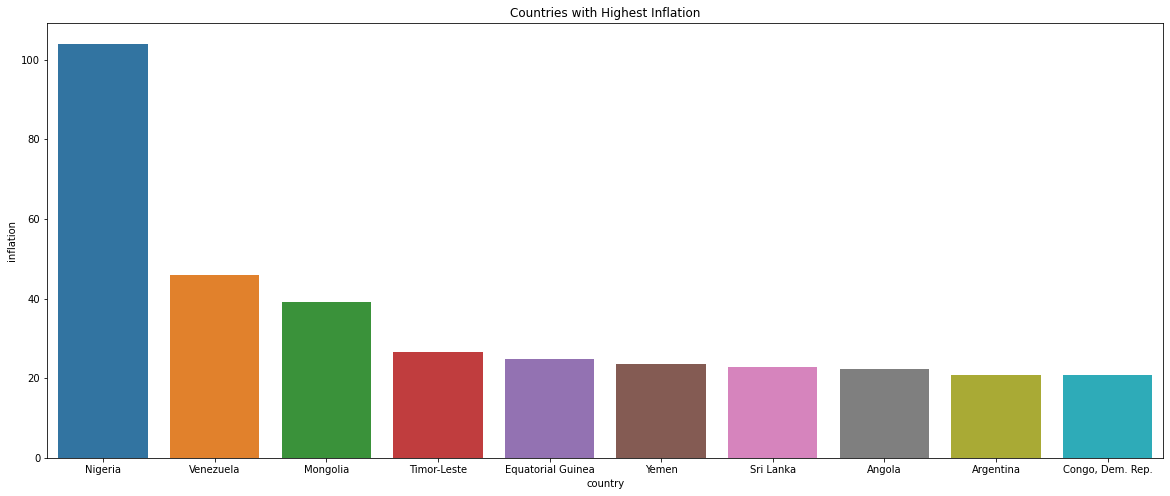

In [682]:
# COUNTRY vs INFLATION
plt.figure(figsize=(20,8))
sns.barplot(x = 'country', y ='inflation', data=Inflation_Top_10)
plt.title('Countries with Highest Inflation')

plt.show()

Observation:
1. Country : nigeria have the highest inflation amongst all the countries.
2. Display the list of Top 10 countries with highest inflation.



In [683]:
LifeExpec_Low_10=df.sort_values(by=['life_expec'],ascending=[True]).head(10)
LifeExpec_Low_10

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,101.29,45.74,428.31,1500,5.45,32.1,3.33,662
87,Lesotho,99.7,460.98,129.87,1181.70,2380,4.15,46.5,3.30,1170
31,Central African Republic,149.0,52.63,17.75,118.19,888,2.01,47.5,5.21,446
166,Zambia,83.1,540.20,85.99,451.14,3280,14.00,52.0,5.40,1460
94,Malawi,90.5,104.65,30.25,160.19,1030,12.10,53.1,5.31,459
137,South Africa,53.7,2082.08,650.83,1994.72,12000,6.35,54.3,2.59,7280
106,Mozambique,101.0,131.99,21.83,193.58,918,7.64,54.5,5.56,419
132,Sierra Leone,160.0,67.03,52.27,137.66,1220,17.20,55.0,5.20,399
64,Guinea-Bissau,114.0,81.50,46.50,192.54,1390,2.97,55.6,5.05,547
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553


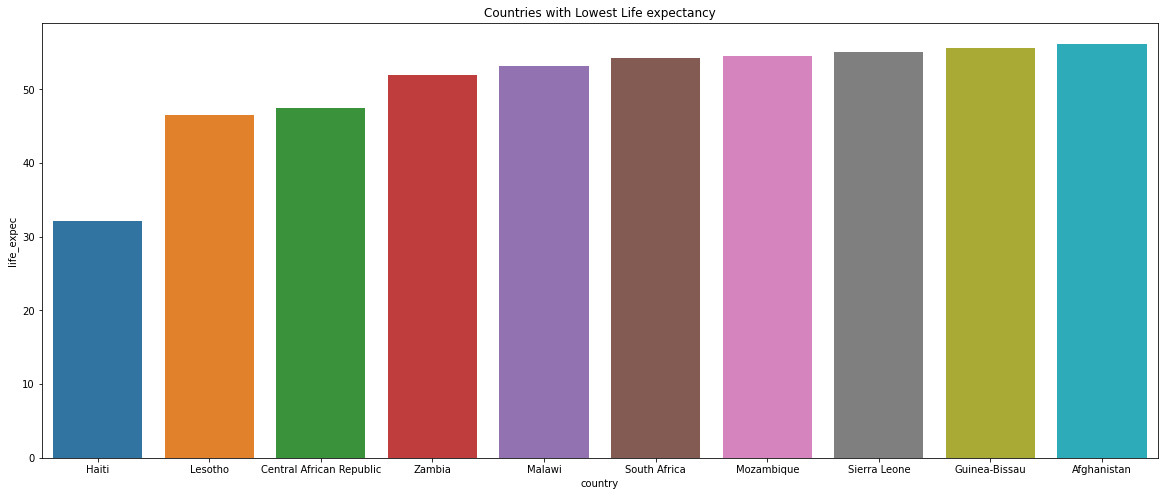

In [684]:
# COUNTRY vs LIFE_EXPEC
plt.figure(figsize=(20,8))
sns.barplot(x = 'country', y ='life_expec', data=LifeExpec_Low_10)
plt.title('Countries with Lowest Life expectancy')

plt.show()

Observation:

1. Country : Haiti  have the Lowest life expectanacy amongst all the countries.
2. Display the list of Top 10 countries with Lowest life expectanacy.


In [685]:
TotalFer_Top_10=df.sort_values(by=['total_fer'],ascending=[False]).head(10)
TotalFer_Top_10

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
112,Niger,123.0,77.26,17.96,170.87,814,2.55,58.8,7.49,348
32,Chad,150.0,330.10,40.63,390.20,1930,6.39,56.5,6.59,897
97,Mali,137.0,161.42,35.26,248.51,1870,4.37,59.5,6.55,708
37,"Congo, Dem. Rep.",116.0,137.27,26.42,165.66,609,20.80,57.5,6.54,334
26,Burundi,93.6,20.61,26.80,90.55,764,12.30,57.7,6.26,231
149,Timor-Leste,62.6,79.20,328.32,1000.80,1850,26.50,71.1,6.23,3600
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530
155,Uganda,81.0,101.74,53.61,170.17,1540,10.60,56.8,6.15,595
25,Burkina Faso,116.0,110.40,38.76,170.20,1430,6.81,57.9,5.87,575
113,Nigeria,130.0,589.49,118.13,405.42,5150,104.00,60.5,5.84,2330


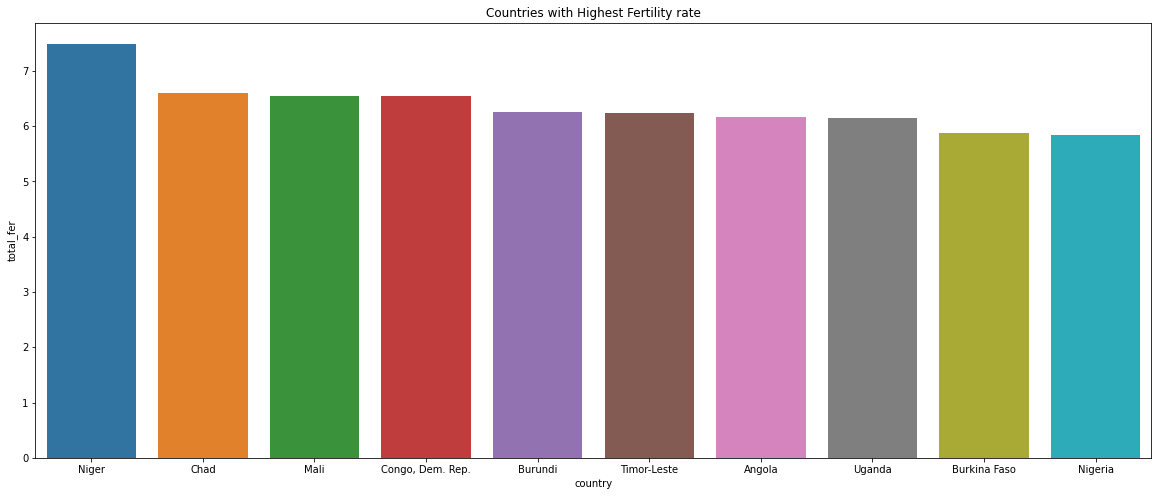

In [686]:
# COUNTRY vs TOTAL_FER
plt.figure(figsize=(20,8))
sns.barplot(x = 'country', y ='total_fer', data=TotalFer_Top_10)
plt.title('Countries with Highest Fertility rate')

plt.show()

Observation:
1. Country : Niger  have the Highest fertility amongst all the countries.
2. Display the list of Top 10 countries with highest ertility.


In [687]:
GDPP_Low_10=df.sort_values(by=['gdpp'],ascending=[True]).head(10)
GDPP_Low_10

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,20.61,26.80,90.55,764,12.30,57.7,6.26,231
88,Liberia,89.3,62.46,38.59,302.80,700,5.47,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,137.27,26.42,165.66,609,20.80,57.5,6.54,334
112,Niger,123.0,77.26,17.96,170.87,814,2.55,58.8,7.49,348
132,Sierra Leone,160.0,67.03,52.27,137.66,1220,17.20,55.0,5.20,399
93,Madagascar,62.2,103.25,15.57,177.59,1390,8.79,60.8,4.60,413
106,Mozambique,101.0,131.99,21.83,193.58,918,7.64,54.5,5.56,419
31,Central African Republic,149.0,52.63,17.75,118.19,888,2.01,47.5,5.21,446
94,Malawi,90.5,104.65,30.25,160.19,1030,12.10,53.1,5.31,459
50,Eritrea,55.2,23.09,12.82,112.31,1420,11.60,61.7,4.61,482


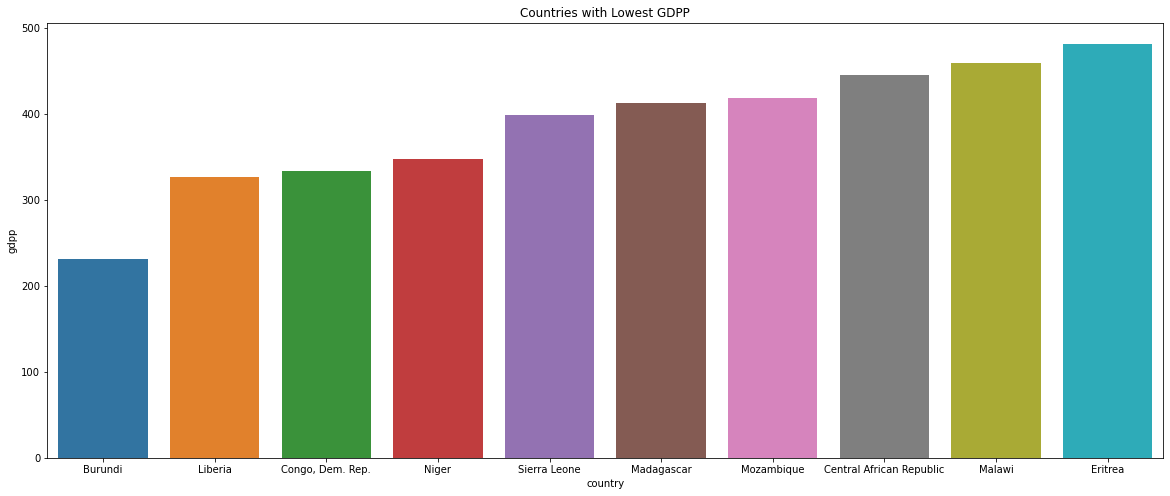

In [688]:
# COUNTRY vs GDPP
plt.figure(figsize=(20,8))
sns.barplot(x = 'country', y ='gdpp', data=GDPP_Low_10)
plt.title('Countries with Lowest GDPP')

plt.show()

Observation:
1. Country : burundi  have the Lowest GDPP amongst all the countries.
2. Display the list of Top 10 countries with Lowest GDPP.


# Outliers Treatment

In [689]:
# To plot the Box plot for all Numerical columns

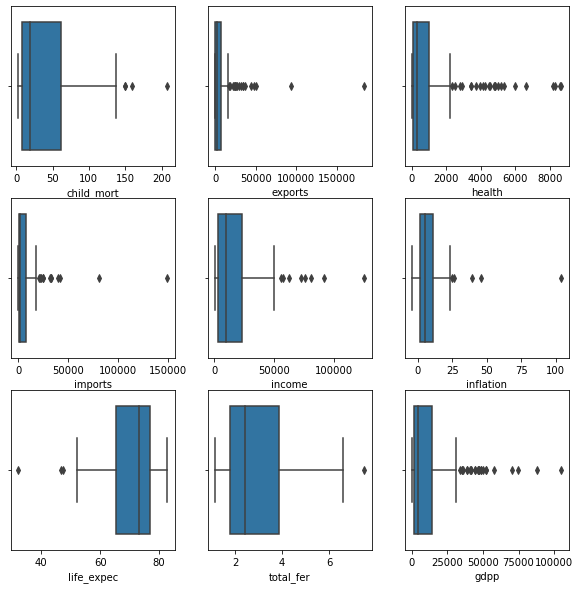

In [690]:
plt.figure(figsize=(10,10))
for i in enumerate(f[1:]):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x=i[1],data=df)


Inferences:
1. We dont see any major Outliers for Numerical data.
2. As data set is not ery large, so we are not removing any suspected Outliers if present.

In [691]:
# Here , we have very less observations, so we are not droppin the Outliers

In [692]:
# HOPKINS Test: To check the Cluster tendency for given Country Data set

In [693]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [694]:
#To check first 5 rows of given Country data set
df.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200


In [695]:
hopkins(df[df.columns[1:]])
# We ran this Hpkins same code 10 times, to esnure vakue is greater than 80.
# Value greater than 80 is cnsidered to bbe good.. For all the 10 iteration value was greater thna 80
# which is a good indicator
# NOTE: ALL datae for Hopkins need to be NUMERIC

#Conclusion: Its a good value .
    

0.9369368791417666

Inference: It is considered a good value for Clustering, we can proceed .



In [696]:
#To get the List of all the columns in Country data set except First Column i.e. country column
df.columns[1:]

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [697]:
# SCALING of the Data

In [698]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df1=ss.fit_transform(df[df.columns[1:]])
df1
# Observation: All the numerical column values are converted into the same scale.

array([[ 1.29153238, -0.4110113 , -0.56503842, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921488, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482717, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53849064, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059527, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54050066, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [699]:
df1=pd.DataFrame(df1)
df1.columns=df.columns[1:]
df1.head()
# Display the scaled value in our data set : df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565038,-0.432275,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439215,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484827,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532366,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [700]:
# Finding best value fo K

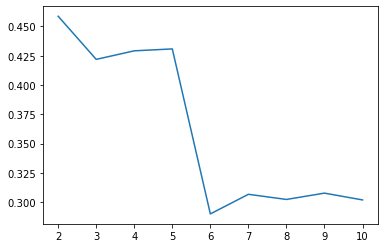

In [701]:
# Using SILHOUETTE SCORE , to find the best value of K
from sklearn.metrics import silhouette_score

ss = []
for k in range(2,11):
    kmeans=KMeans(n_clusters=k).fit(df1)
    ss.append([k, silhouette_score(df1, kmeans.labels_)])
    
sil = pd.DataFrame(ss)
plt.plot(sil[0],sil[1])

Observation:
1. Max  value of K is at 2. When K=2, it would simply mean dividing the Cluster into two halves. So , lets considr the next best value.
2. Next best value can be K=5, as per below stpes we observed that it leads to few Cluster with very less data points.
3. Therefore, considering the next best valueof K=3 for analysis as per Silhouette Score graph.

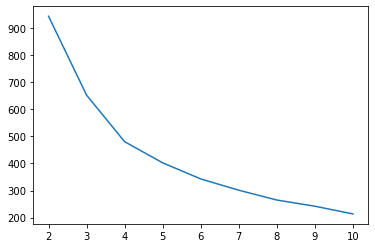

In [702]:
# Using ELBOW CURVE, to identify the best value of K
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])

ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])

Obsevation:
1. Based on the Elbow cure, we can see elobow is formed at  at K=3 and K=4.
2. We can consider K=3 as best value of K, considering its a small value and which reduces the complexity as well.


Conclusion:
1. Overall, Based on the Silhouette Score and Elbow curve, we can conclude that Final value to be considered 
for Clustering can be taken as K=3.
2. When K=3, we do have good count of data points in each Cluster, which indicates a good behavior for Clustering.


In [703]:
#Initally, when we tried to consider K= 5 ( for KMeans Algorithm)

In [704]:
kmean=KMeans(n_clusters=5, random_state=0)
kmean.fit(df1)

# We are using Random_state here, so that the Cluster  label dont chnage even after runnning the code multiple times.


KMeans(n_clusters=5, random_state=0)

In [705]:
kmean.labels_
# To display the Cluster labels for each data point

array([3, 1, 1, 3, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 3, 1, 1, 1, 3,
       1, 0, 1, 3, 3, 1, 3, 0, 1, 3, 3, 1, 1, 1, 3, 3, 3, 1, 3, 1, 0, 1,
       0, 1, 1, 1, 1, 3, 3, 1, 1, 0, 0, 3, 3, 1, 0, 3, 0, 1, 1, 3, 3, 1,
       3, 1, 0, 1, 1, 1, 3, 0, 0, 0, 1, 0, 1, 1, 3, 3, 0, 1, 3, 1, 1, 3,
       3, 1, 1, 4, 1, 3, 3, 1, 1, 3, 0, 3, 1, 1, 1, 2, 1, 1, 3, 1, 3, 1,
       0, 0, 3, 2, 0, 1, 3, 1, 1, 1, 1, 1, 1, 0, 1, 1, 3, 1, 1, 3, 1, 1,
       3, 0, 1, 0, 3, 3, 1, 0, 1, 1, 3, 1, 0, 0, 1, 3, 1, 3, 3, 1, 1, 1,
       1, 3, 1, 0, 0, 0, 1, 1, 1, 2, 1, 3, 3])

In [706]:
# Peforfming  Cluster Profilimng on the Original data set: df
df['cluster_id']=kmean.labels_


In [707]:
df.head()
# To display the first 5 rows of Country data set along with Cluster IDs

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553,3
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530,3
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200,1


In [708]:
# To check the Count of Data points in each Cluster
df.cluster_id.value_counts()

1    86
3    47
0    30
2     3
4     1
Name: cluster_id, dtype: int64

Observation:
1. Cluster-2 and Cluster-4 have very less data points in comparison with other Cluster.
2. It indicates  that the Value of K=5 we have selected is not Optimal and we should select the next best value of K , whihc is lower than the Current value.
3. As per above graphs, we already concluded the next best value of K=3.

In [709]:
# Considering Final value of K=3 for Clustering ahead

In [710]:
kmean=KMeans(n_clusters=3, random_state=0)
kmean.fit(df1)

KMeans(n_clusters=3, random_state=0)

In [711]:
kmean.labels_
# To display the Cluster Labels for each data point

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [712]:
df=df.drop('cluster_id',axis=1)
# Dropping the Initial Cluster Id column- when K was taken as 5

In [713]:
df.head()
# Obseration: Clsuter_Id column is now dropped from data set

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200


In [714]:
# Cluster Profiling when K=3

df['cluster_id']=kmean.labels_
# Adding new Column, Cluster_id to store the Clsuter IDs foreach data point

In [715]:
df.head()
# To display the Clsuter Ids of each dat pint in original data frame: df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200,2


In [716]:
# To check the Count of Data points in each Cluster
df.cluster_id.value_counts()

# Observation: We have sufficient data points in each Cluster

2    91
0    48
1    28
Name: cluster_id, dtype: int64

In [717]:
# Plotting: We wont be using all the columns.
# Instead Just 3 colsun sprovided to us 
#gdpp, child_mort, income
# Total =3 plots to be be generate here
df


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.93,1565.19,2950,2.62,63.0,3.50,2970,2
163,Venezuela,17.1,3847.50,662.85,2376.00,16500,45.90,75.4,2.47,13500,2
164,Vietnam,23.3,943.20,89.60,1050.62,4490,12.10,73.1,1.95,1310,2
165,Yemen,56.3,393.00,67.86,450.64,4480,23.60,67.5,4.67,1310,0


# PLOTTING:

As part of the Business Problem Statement: We would be using 3 Columns: 
child_mort,income and gdpp for Cluster Profiling which have high significnace of Clustering.

        

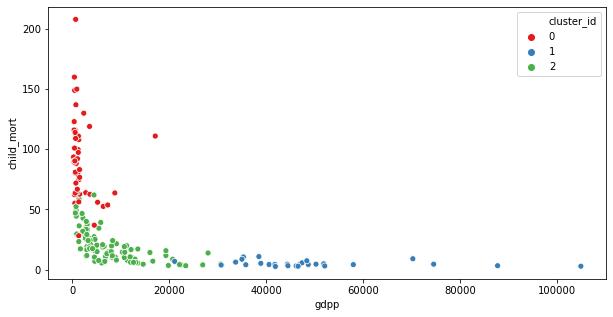

In [718]:
# SCATTER PLOT : GDPP Vs CHILD_MORT
plt.figure(figsize=(10,5))
sns.scatterplot(x='gdpp',y='child_mort',hue='cluster_id',data=df,palette='Set1')
plt.show()

Inference:
1. 


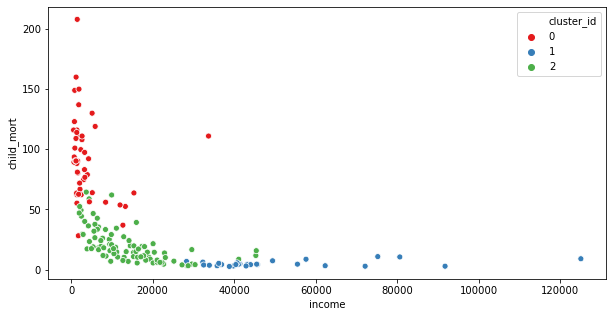

In [719]:
# SCATTER PLOT: INCOME S CHILD_MORT
plt.figure(figsize=(10,5))
sns.scatterplot(x='income',y='child_mort',hue='cluster_id',data=df,palette='Set1')
plt.show()

Inference:


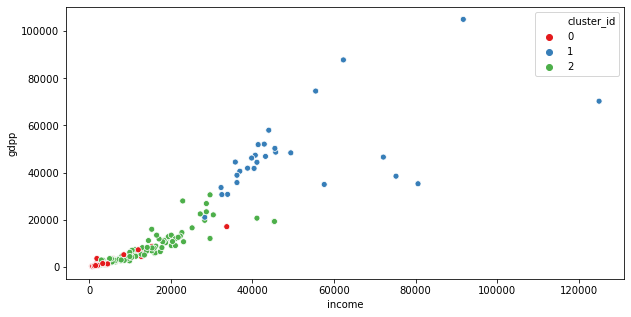

In [720]:
# SCATTER PLOT: INCOME VS GDPP
plt.figure(figsize=(10,5))
sns.scatterplot(x='income',y='gdpp',hue='cluster_id',data=df,palette='Set1')
plt.show()

Inference:


# Cluster Profiling

1. As per the Business Problem, we would be using 3 columns from Country data set naming gdpp, child_mort and income columns.
2. Our Objective is to find the Cluster with Low GDPP, Low INCOME and High CHILD_MORT .
3. List of Top 5 Countries under the Identified Cluster can be considered and present to the CEO of Company for providing Emergenecy AID and fund.


In [721]:
df[['gdpp', 'child_mort', 'income','cluster_id']].groupby('cluster_id').mean()
# Grouping the given Significant columns based on Cluster ID

,gdpp,child_mort,income
cluster_id,,,
0,1909.208333,91.610417,3897.354167
1,48114.285714,5.046429,50178.571429
2,7979.912088,20.357143,13968.021978


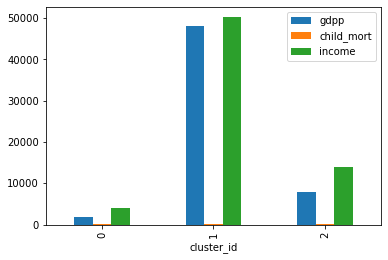

In [722]:
# Bar Plot for given column based on Cluster Id
df[['gdpp', 'child_mort', 'income','cluster_id']].groupby('cluster_id').mean().plot(kind='bar')


Observation:
1. Cluster with Cluster_Id=0 satisfies our Business Objective of Low GDPP, Low INCOME and High CHILD_MORT.


In [723]:
# To find ALL the ountries that needed the AID for Cluster with Cluster_id=0

C1=df[df['cluster_id']==0]
C1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.440,56.2,5.82,553,0
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.400,60.1,6.16,3530,0
17,Benin,111.0,180.40,31.08,281.98,1820,0.885,61.8,5.36,758,0
21,Botswana,52.5,2768.60,527.05,3257.55,13300,8.920,57.1,2.88,6350,0
25,Burkina Faso,116.0,110.40,38.76,170.20,1430,6.810,57.9,5.87,575,0


In [724]:
C1.shape
# To find the Size of Cluster with Cluster_id=0 

#Observation:
#In Total there are around 48 countries in Cluster with Cluster_id= 0

(48, 11)

In [725]:
# To find the List of Top 5 Countries that need  Financal AID  and whihc need to be preserted to the CEO of Company.
C1.sort_values(by=['gdpp', 'child_mort', 'income'],ascending=[True,False,True]).head(5)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,20.61,26.80,90.55,764,12.30,57.7,6.26,231,0
88,Liberia,89.3,62.46,38.59,302.80,700,5.47,60.8,5.02,327,0
37,"Congo, Dem. Rep.",116.0,137.27,26.42,165.66,609,20.80,57.5,6.54,334,0
112,Niger,123.0,77.26,17.96,170.87,814,2.55,58.8,7.49,348,0
132,Sierra Leone,160.0,67.03,52.27,137.66,1220,17.20,55.0,5.20,399,0


Inference:
1. Top 5 Countries that can be presented to CEO for Financial AID are:
    Burundi, liberia, Congo,Dem.Rep. , Niger and Sierra Leone
2. This result is obtained based on the KMeans Algorithm.

In [726]:
# Hierarchical Clustering

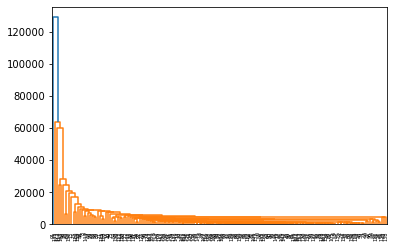

In [727]:
#Using Single Linkage
mergings=linkage(df[df.columns[1:]],method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

Inference:
1. As we can see, it is difficult to read the above Dendrogram, as we have used Single Linkage in this case.



In [728]:
#Using Complete Linkage

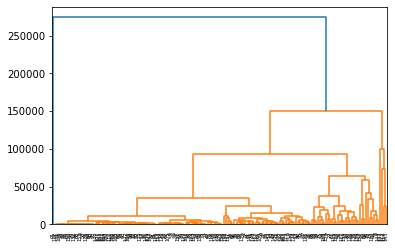

In [729]:
mergings=linkage(df[df.columns[1:]],method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

Inference:
1. Based on the Cut at different pointsin Dendrogram, we may get different number of Clsuters.
2. We can take value of K=3

In [730]:
#Using Cut_tree to cut the dendrogram at sepecific point
cut_tree(mergings,n_clusters=3).shape


(167, 1)

In [731]:

cut_tree(mergings,n_clusters=3)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [732]:
# Numbers are obstained as an array , so lets Reshape them

In [733]:
# Assigning the Cluster Ids
cluster_labels=cut_tree(mergings,n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [734]:
# Assign Cluster Labels (obtained by Hierarchical Clustering to data set)
df['cluster_labels']=cluster_labels
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090,2,0
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460,2,0
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200,2,0


Observation:
1. Data frame with newly created Cluster label column is created.
2. Cluster Id column is assigned by K- Means and Cluster Label is assigned by Hierrachical Clustering.


# PLOTS

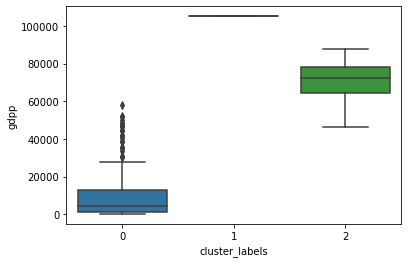

In [735]:
#BOX PLOT CLUSTER_LABELS vs GDPP
sns.boxplot(x='cluster_labels',y='gdpp',data=df)

Observation:
1. Cluster 0 have Lowest GDPP


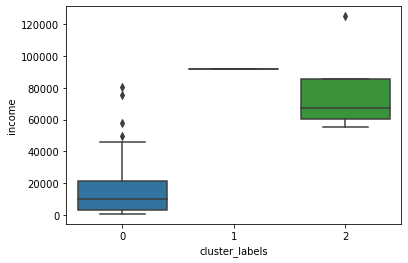

In [736]:
#BOX PLOT CLUSTER_LABELS vs INCOME
sns.boxplot(x='cluster_labels',y='income',data=df)

Observation:
 1. Cluster 0 have lowest Income

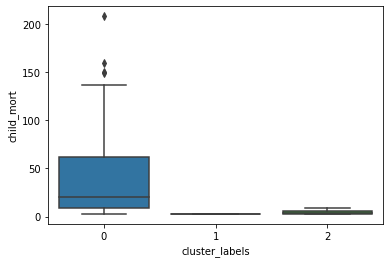

In [737]:
#BOX PLOT CLUSTER_LABELS vs CHILD_MORT
sns.boxplot(x='cluster_labels',y='child_mort',data=df)

# Cluster 0 fulfills the criteria

Observation:
1. Cluster 0 have Highest Child mortality


Inference:
Cluster 0 is selected as final cluster to get list of countries for our Business objective


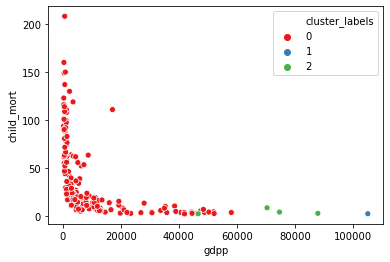

In [738]:
sns.scatterplot(x='gdpp',y='child_mort',hue='cluster_labels',data=df,palette='Set1')

Observation:
1. Child_mort decreases with increasing GDPP


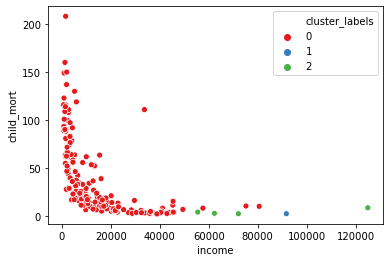

In [739]:
sns.scatterplot(x='income',y='child_mort',hue='cluster_labels',data=df,palette='Set1')

Observation:
1. Child_mort decreases with increasing Income


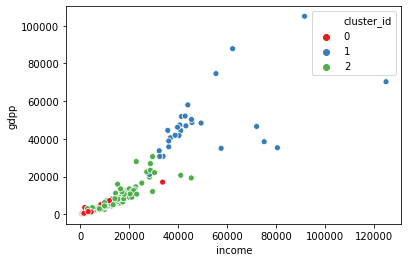

In [740]:
sns.scatterplot(x='income',y='gdpp',hue='cluster_id',data=df,palette='Set1')

Observation:
1. Income of employee increases with increasing GDPP of country


In [741]:
#Assignnig the Cluster labels to the Data set
C0=df[df['cluster_labels']==0]
C0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090,2,0
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460,2,0
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200,2,0


In [742]:
#To find the List of Top 5 Countries that need  Financal AID  and whihc need to be preserted to the CEO of Company.

C0.sort_values(by=['gdpp', 'child_mort', 'income'],ascending=[True,False,True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
26,Burundi,93.6,20.61,26.80,90.55,764,12.30,57.7,6.26,231,0,0
88,Liberia,89.3,62.46,38.59,302.80,700,5.47,60.8,5.02,327,0,0
37,"Congo, Dem. Rep.",116.0,137.27,26.42,165.66,609,20.80,57.5,6.54,334,0,0
112,Niger,123.0,77.26,17.96,170.87,814,2.55,58.8,7.49,348,0,0
132,Sierra Leone,160.0,67.03,52.27,137.66,1220,17.20,55.0,5.20,399,0,0


Inference:
1. Top 5 Countries that can be presented to CEO for Financial AID are:
    Burundi, liberia, Congo,Dem.Rep. , Niger and Sierra Leone
2. This result is obtained based on the Hierarchical Clustering.